In [1]:
import requests
import os
import json

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P1130"
RESOLUTION=1

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

# Function to retrieve plant configurations
def get_plant_configurations(plant_code):
    """
    Retrieves the plant configurations from the API.

    Args:
        plant_code (str): The plant code.

    Returns:
        dict: The API response as a dictionary.
    """
    url = f"{BASE_URL}/{plant_code}/config"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve configurations: {response.status_code}, {response.text}")

# Main execution
try:
    # Retrieve configurations
    configurations = get_plant_configurations(PLANT_CODE)

    # Print the response on the screen with better formatting
    print("\nAPI Response:")
    print("=" * 40)
    for config in configurations:
        for key, value in config.items():
            print(f"{key}: {value}")
        print("-" * 40)

    # Save the response to a file
    base_dir = "Data"
    os.makedirs(base_dir, exist_ok=True)
    file_path = os.path.join(base_dir, f"{PLANT_CODE}_configurations.json")
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(configurations, file, indent=4)
    print(f"\nConfigurations saved to: {file_path}")

    # Create a constant variable for the version
    VERSION = configurations[-1].get("v", "N/A")  # Assuming the version is in the first configuration
    print(f"\nVERSION constant created: {VERSION}")

except Exception as e:
    print("Error:", e)


API Response:
v: 1
t: 1980-01-01 00:00:00
----------------------------------------

Configurations saved to: Data/P1130_configurations.json

VERSION constant created: 1


In [2]:
import requests
import os
import csv


def get_sensors(plant_code, config_version, sensor_types=None):
    """
    Retrieves a list of sensors from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        sensor_types (str or list, optional): Type(s) of sensors to filter (e.g., "AC_ACTIVE_ENERGY" or ["AC_ACTIVE_ENERGY", "MODULE_SOLAR_IRRADIANCE"]).

    Returns:
        list: Array of sensor objects.
    """
    url = f"{BASE_URL}/{plant_code}/sensors/{config_version}"
    params = {}
    if sensor_types:
        params["type"] = sensor_types if isinstance(sensor_types, str) else ",".join(sensor_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve sensors: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_sensors_to_csv(plant_code, sensors):
    """
    Saves the sensors to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors (list): List of sensor objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors.csv")

    # Write sensors to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Source", "Visible", "Enabled"])
        # Write the data
        for sensor in sensors:
            writer.writerow([
                sensor.get("id", "N/A"),
                sensor.get("name", "N/A"),
                sensor.get("type", "N/A"),
                sensor.get("desc", "N/A"),
                sensor.get("oid", "N/A"),
                sensor.get("props", "N/A"),
                sensor.get("source", "N/A"),
                sensor.get("visible", "N/A"),
                sensor.get("enabled", "N/A")
            ])

    print(f"Sensors saved to: {csv_file_path}")

def print_sensors(sensors):
    """
    Prints the sensors nicely on the screen.

    Args:
        sensors (list): List of sensor objects.
    """
    print("\nSensors List:")
    for sensor in sensors:
        print(f"ID: {sensor.get('id', 'N/A')}")
        print(f"Name: {sensor.get('name', 'N/A')}")
        print(f"Type: {sensor.get('type', 'N/A')}")
        print(f"Description: {sensor.get('desc', 'N/A')}")
        print(f"OID: {sensor.get('oid', 'N/A')}")
        print(f"Properties: {sensor.get('props', 'N/A')}")
        print(f"Source: {sensor.get('source', 'N/A')}")
        print(f"Visible: {sensor.get('visible', 'N/A')}")
        print(f"Enabled: {sensor.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = VERSION       # Configuration version
    sensor_types = None      # Retrieve all sensor types

    # Retrieve sensors
    sensors = get_sensors(plant_code, config_version, sensor_types)
    print(len(sensors), "sensors found")
    # Print sensors nicely
    print_sensors(sensors)

    # Save sensors to CSV
    save_sensors_to_csv(plant_code, sensors)
except Exception as e:
    print("Error:", e)

3572 sensors found

Sensors List:
ID: 1
Name: Voltage L1
Type: VOLTAGE
Description: 
OID: 1.1.14:1
Properties: {'alarm_c': '5', 'alarm_debounce': '60', 'alarm_function': '', 'alarm_max_threshold': '0', 'alarm_min_threshold': '0', 'alarm_tdc': '60', 'alarm_tdo': '60', 'alarm_type': '', 'cast': 'U32', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'register': '3c552', 'sampling_period': '300'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 10
Name: Temperature
Type: TEMPERATURE
Description: 
OID: 1.1.1.1:10
Properties: {'alarm_c': '3', 'alarm_debounce': '300', 'alarm_function': 'LIMITALARM', 'alarm_max_threshold': '70', 'alarm_min_threshold': '-10', 'alarm_tdc': '300', 'alarm_tdo': '300', 'alarm_type': '52', 'c_high_pass': '', 'c_low_pass': '', 'cast': 'U16', 'copy_to': '', 'data_age_lmt': '0', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'mask': '', 'mask_value': '1', 'register': '31064', 'sampling_period': '

In [3]:
import pandas as pd
from datetime import datetime, timedelta
import requests
import time

# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")

# Step 3: Retrieve data for the sensor
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
end_date = datetime.now().replace(minute=0, second=0, microsecond=0)  # Round down to the nearest full hour
max_interval = timedelta(days=92)  # Maximum allowed interval (92 days)
no_data_threshold = timedelta(days=365)  # Stop if no data is returned for more than 1 year

current_end = end_date
last_reading = None
no_data_duration = timedelta(0)

while no_data_duration < no_data_threshold:
    current_start = current_end - max_interval
    payload = {
        "from": current_start.strftime("%Y-%m-%d %H:%M:%S"),
        "to": current_end.strftime("%Y-%m-%d %H:%M:%S"),
        "sensors": [sensor_id],
        "resolution": RESOLUTION
    }

    # Make the POST request to the API
    response = requests.post(TREND_URL, headers=HEADERS, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
        except ValueError:
            print("Failed to parse JSON response.")
            break

        # Check if data is returned for the sensor
        if str(sensor_id) in data and data[str(sensor_id)]:
            sensor_data = data[str(sensor_id)]
            sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
            sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime

            # Update the last reading to the minimum timestamp in this range
            last_reading = sensor_df["timestamp"].min()

            print(f"Data retrieved for range {current_start} to {current_end}.")
            no_data_duration = timedelta(0)  # Reset no data duration
            del sensor_df  # Clear memory
        else:
            print(f"No data for sensor {sensor_id} in range {current_start} to {current_end}.")
            no_data_duration += max_interval  # Increment no data duration
    else:
        print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
        print("Response:", response.text)
        break

    # Move to the previous time range
    current_end = current_start - timedelta(seconds=1)
    time.sleep(1)  # Avoid hitting API rate limits

# Step 4: Save the last reading going backward
if last_reading:
    last_day = last_reading.date()
    print(f"The last day of data for the sensor going backward is: {last_day}")
else:
    print("No data found for the sensor.")

Sensor ID for the found sensor: 156
Data retrieved for range 2025-03-23 12:00:00 to 2025-06-23 12:00:00.
Data retrieved for range 2024-12-21 11:59:59 to 2025-03-23 11:59:59.
Data retrieved for range 2024-09-20 11:59:58 to 2024-12-21 11:59:58.
Data retrieved for range 2024-06-20 11:59:57 to 2024-09-20 11:59:57.
Data retrieved for range 2024-03-20 11:59:56 to 2024-06-20 11:59:56.
Data retrieved for range 2023-12-19 11:59:55 to 2024-03-20 11:59:55.
Data retrieved for range 2023-09-18 11:59:54 to 2023-12-19 11:59:54.
Data retrieved for range 2023-06-18 11:59:53 to 2023-09-18 11:59:53.
Data retrieved for range 2023-03-18 11:59:52 to 2023-06-18 11:59:52.
Data retrieved for range 2022-12-16 11:59:51 to 2023-03-18 11:59:51.
Data retrieved for range 2022-09-15 11:59:50 to 2022-12-16 11:59:50.
Data retrieved for range 2022-06-15 11:59:49 to 2022-09-15 11:59:49.
Data retrieved for range 2022-03-15 11:59:48 to 2022-06-15 11:59:48.
No data for sensor 156 in range 2021-12-13 11:59:47 to 2022-03-15 1

In [123]:
import requests
import pandas as pd
import time
import os
from datetime import datetime, timedelta

# API endpoint URLs
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# Define the specific sensors to process
sensor_ids = ["timestamp", "D.171.ISIRR", "172", "D.156.DELTA","156"]

# Define the file path
file_path = f"data_{PLANT_CODE}_{RESOLUTION}.csv"

# Check if the file exists and has content
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    print(f"File '{file_path}' exists and is not empty. Loading data into df.")
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Check the last reading in the file
    last_reading = df.index.max()
    print(f"Last reading in the file: {last_reading}")

    # Define the current time minus 1 hour
    current_time_minus_1h = datetime.now() - timedelta(hours=1)

    # If the last reading is earlier than current_time_minus_1h, fetch missing data
    if last_reading < current_time_minus_1h:
        print(f"Fetching missing data from {last_reading + timedelta(seconds=1)} to {current_time_minus_1h}.")

        # Define the start and end dates for the missing period
        start_date = last_reading + timedelta(seconds=1)
        end_date = current_time_minus_1h

        max_interval = timedelta(days=92)  # Maximum interval for resolution 0

        # Split the time range into chunks of the maximum interval
        time_ranges = []
        current_start = start_date
        while current_start < end_date:
            current_end = min(current_start + max_interval, end_date)
            time_ranges.append((current_start, current_end))
            current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

        # Initialize a list to store all sensor data
        all_data = []

        # Loop through each time range
        for time_idx, (start_time, end_time) in enumerate(time_ranges):
            print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
            payload = {
                "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
                "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
                "sensors": sensor_ids,
                "resolution": RESOLUTION  # Use the selected resolution
            }

            # Make the POST request to the API
            response = requests.post(TREND_URL, headers=HEADERS, json=payload)

            if response.status_code == 200:
                # Parse the JSON response
                data = response.json()

                # Transform the data into a long-format DataFrame
                for sensor_id, sensor_data in data.items():
                    if not sensor_data:
                        print(f"No data returned for sensor: {sensor_id}")
                        continue
                    sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                    sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                    sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                    all_data.append(sensor_df)  # Append to the list of all data
            else:
                print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
                print("Response:", response.text)

            # Respect the API rate limit (no more than 5 calls per minute)
            time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

        if all_data:
            long_df = pd.concat(all_data, ignore_index=True)

            # Pivot the long-format DataFrame to wide format
            new_data = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

            # Flatten the multi-level column index (if it exists)
            if isinstance(new_data.columns, pd.MultiIndex):  # Check if columns are multi-level
                new_data.columns = new_data.columns.get_level_values(0)  # Flatten multi-level columns

            # Ensure 'timestamp' is the index
            new_data.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

            # Append the new data to the existing DataFrame
            df = pd.concat([df, new_data])

            # Save the updated DataFrame back to the CSV file
            df.to_csv(file_path, index=True)  # Save with the index

            print(f"Missing data added to '{file_path}'.")
        else:
            print("No new data fetched from the API.")
else:
    print(f"File '{file_path}' does not exist or is empty. Initializing with historical data.")

    # Initialize the DataFrame with historical data
    start_date = datetime(2022, 3, 18, 0, 0, 0)  # Default start date
    end_date = datetime.now() - timedelta(hours=1)  # Current time minus 1 hour

    max_interval = timedelta(days=92)  # Maximum interval for resolution 0

    # Split the time range into chunks of the maximum interval
    time_ranges = []
    current_start = start_date
    while current_start < end_date:
        current_end = min(current_start + max_interval, end_date)
        time_ranges.append((current_start, current_end))
        current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

    # Initialize a list to store all sensor data
    all_data = []

    # Loop through each time range
    for time_idx, (start_time, end_time) in enumerate(time_ranges):
        print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
        payload = {
            "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
            "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
            "sensors": sensor_ids,
            "resolution": RESOLUTION  # Use the selected resolution
        }

        # Make the POST request to the API
        response = requests.post(TREND_URL, headers=HEADERS, json=payload)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Transform the data into a long-format DataFrame
            for sensor_id, sensor_data in data.items():
                if not sensor_data:
                    print(f"No data returned for sensor: {sensor_id}")
                    continue
                sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                all_data.append(sensor_df)  # Append to the list of all data
        else:
            print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)

        # Respect the API rate limit (no more than 5 calls per minute)
        time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

    if all_data:
        long_df = pd.concat(all_data, ignore_index=True)

        # Pivot the long-format DataFrame to wide format
        df = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

        # Flatten the multi-level column index (if it exists)
        if isinstance(df.columns, pd.MultiIndex):  # Check if columns are multi-level
            df.columns = df.columns.get_level_values(0)  # Flatten multi-level columns

        # Ensure 'timestamp' is the index
        df.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

        # Save the cleaned DataFrame back to the CSV file
        df.to_csv(file_path, index=True)  # Save with the index

        print(f"File '{file_path}' initialized with historical data.")
    else:
        print("No data fetched from the API. Initializing an empty DataFrame.")
        df = pd.DataFrame()

# Reload the DataFrame to verify the structure
try:
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Remove the name from the index
    df.index.name = None  # Remove the name of the index

    # Display the cleaned DataFrame
    print("Cleaned DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"File '{file_path}' still does not exist. Please check the initialization process.")
except ValueError as e:
    print(f"Error loading CSV: {e}")
    print("CSV content might be missing the 'timestamp' column. Please check the file.")

File 'data_P1130_1.csv' does not exist or is empty. Initializing with historical data.
Processing time range 1: 2022-03-18 00:00:00 to 2022-06-18 00:00:00
Processing time range 2: 2022-06-18 00:00:01 to 2022-09-18 00:00:01
Processing time range 3: 2022-09-18 00:00:02 to 2022-12-19 00:00:02
Processing time range 4: 2022-12-19 00:00:03 to 2023-03-21 00:00:03
Processing time range 5: 2023-03-21 00:00:04 to 2023-06-21 00:00:04
Processing time range 6: 2023-06-21 00:00:05 to 2023-09-21 00:00:05
Processing time range 7: 2023-09-21 00:00:06 to 2023-12-22 00:00:06
Processing time range 8: 2023-12-22 00:00:07 to 2024-03-23 00:00:07
Processing time range 9: 2024-03-23 00:00:08 to 2024-06-23 00:00:08
Processing time range 10: 2024-06-23 00:00:09 to 2024-09-23 00:00:09
Processing time range 11: 2024-09-23 00:00:10 to 2024-12-24 00:00:10
Processing time range 12: 2024-12-24 00:00:11 to 2025-03-26 00:00:11
Processing time range 13: 2025-03-26 00:00:12 to 2025-06-23 14:41:07.585673
File 'data_P1130_1

In [143]:
df.isna().sum()

156            104
172             34
D.156.DELTA    105
D.171.ISIRR      7
dtype: int64

In [157]:
import pandas as pd

def fill_missing_records_with_nan(df):
    """
    Fills missing records in the DataFrame based on a 1-hour resolution by adding rows with NaN values.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with a datetime index.
    
    Returns:
        pd.DataFrame: The DataFrame with missing records filled with NaN values.
    """
    # Generate a complete time index with 1-hour resolution
    complete_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1H")
    
    # Reindex the DataFrame to include all timestamps in the complete index
    df = df.reindex(complete_index)
    
    return df
df2=df.copy()

df2=fill_missing_records_with_nan(df2)

/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_28681/3862326888.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1H")


In [158]:
df2.loc["2023-11-19"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-19 00:00:00,NaN,3.163,NaN,2.337
2023-11-19 01:00:00,NaN,3.590,NaN,2.292
2023-11-19 02:00:00,NaN,3.826,NaN,2.290
2023-11-19 03:00:00,NaN,3.820,NaN,2.301
2023-11-19 04:00:00,NaN,3.597,NaN,2.311
2023-11-19 05:00:00,NaN,3.229,NaN,9.094
2023-11-19 06:00:00,NaN,3.304,NaN,97.883
2023-11-19 07:00:00,NaN,3.587,NaN,104.321
2023-11-19 08:00:00,NaN,NaN,NaN,NaN
2023-11-19 09:00:00,NaN,NaN,NaN,NaN


In [159]:
def handle_nan_172(df):
    """
    Handles missing values in the '172' column by interpolating all NaN values.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with '172', 'D.156.DELTA', and 'D.171.ISIRR' columns.
    
    Returns:
        pd.DataFrame: The DataFrame with missing values in '172' handled.
    """
    # Interpolate all missing values in the '172' column
    df["172"] = df["172"].interpolate(method="linear")

handle_nan_172(df2)

In [161]:
df2.loc["2023-11-19"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-19 00:00:00,NaN,3.163000,NaN,2.337
2023-11-19 01:00:00,NaN,3.590000,NaN,2.292
2023-11-19 02:00:00,NaN,3.826000,NaN,2.290
2023-11-19 03:00:00,NaN,3.820000,NaN,2.301
2023-11-19 04:00:00,NaN,3.597000,NaN,2.311
2023-11-19 05:00:00,NaN,3.229000,NaN,9.094
2023-11-19 06:00:00,NaN,3.304000,NaN,97.883
2023-11-19 07:00:00,NaN,3.587000,NaN,104.321
2023-11-19 08:00:00,NaN,3.621571,NaN,NaN
2023-11-19 09:00:00,NaN,3.656143,NaN,NaN


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def handle_nan_isirr(df):
    """
    Handles NaN values in the 'D.171.ISIRR' column based on specific rules:
    1. If 'D.156.DELTA' is 0, set 'D.171.ISIRR' to 0.
    2. If a NaN is followed by 0 and 'D.156.DELTA' is also 0, set only that NaN to 0.
    3. Train a linear regression model using data within a 1-month window around the missing record.
    4. Predict missing values using the local model only when 'D.156.DELTA' is != 0.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with 'D.171.ISIRR' and 'D.156.DELTA' columns.
    
    Returns:
        pd.DataFrame: The DataFrame with NaN values handled in 'D.171.ISIRR'.
    """
    for i in range(len(df)):
        if pd.isna(df.loc[df.index[i], "D.171.ISIRR"]):  # Check if the value is NaN
            delta_value = df.loc[df.index[i], "D.156.DELTA"]
            
            # Rule 1: If 'D.156.DELTA' is 0, set 'D.171.ISIRR' to 0
            if delta_value == 0:
                df.loc[df.index[i], "D.171.ISIRR"] = 0
                continue
            
            # Rule 2: If NaN is followed by 0 and 'D.156.DELTA' is also 0, set only that NaN to 0
            if i + 1 < len(df) and df.loc[df.index[i + 1], "D.171.ISIRR"] == 0 and df.loc[df.index[i + 1], "D.156.DELTA"] == 0:
                df.loc[df.index[i], "D.171.ISIRR"] = 0
                continue
            
            # Rule 3: Train a linear regression model using a 1-month window
            # Define the 1-month window around the missing record
            current_time = df.index[i]
            start_time = current_time - pd.Timedelta(days=30)
            end_time = current_time + pd.Timedelta(days=30)
            
            # Filter the DataFrame for the 1-month window
            window_data = df[(df.index >= start_time) & (df.index <= end_time)].dropna(subset=["D.156.DELTA", "D.171.ISIRR"])
            
            # Train a linear regression model using the window data
            if len(window_data) > 1:  # Ensure there is enough data to train the model
                X_train = window_data[["D.156.DELTA"]].values  # Feature: D.156.DELTA
                y_train = window_data["D.171.ISIRR"].values    # Target: D.171.ISIRR
                model = LinearRegression()
                model.fit(X_train, y_train)
                
                # Predict the missing value using the local regression model
                if not pd.isna(delta_value):  # Ensure 'D.156.DELTA' is not NaN
                    predicted_value = model.predict(np.array([[delta_value]]))[0]
                    df.loc[df.index[i], "D.171.ISIRR"] = predicted_value
    
    return df

def handle_nan_172(df):
    """
    Handles missing values in the '172' column by interpolating all NaN values.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with '172', 'D.156.DELTA', and 'D.171.ISIRR' columns.
    
    Returns:
        pd.DataFrame: The DataFrame with missing values in '172' handled.
    """
    # Interpolate all missing values in the '172' column
    df["172"] = df["172"].interpolate(method="linear")
    
df3= handle_nan_isirr(df2)

In [162]:
df3.loc["2023-11-18":"2023-11-19"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-18 00:00:00,57678264.0,10.060,0.0,2.351
2023-11-18 01:00:00,57678264.0,10.430,0.0,2.358
2023-11-18 02:00:00,57678264.0,10.706,0.0,2.368
2023-11-18 03:00:00,57678264.0,10.552,0.0,2.381
2023-11-18 04:00:00,57678264.0,10.777,0.0,2.376
2023-11-18 05:00:00,57678264.0,10.513,0.0,6.778
2023-11-18 06:00:00,57678292.0,10.301,28.0,20.600
2023-11-18 07:00:00,57678384.0,9.993,92.0,34.735
2023-11-18 08:00:00,57678488.0,8.513,104.0,37.844
2023-11-18 09:00:00,57678676.0,7.054,188.0,59.048


In [164]:
def handle_nan_156(df):
    """
    Handles NaN values in the '156' column based on specific rules:
    1. If the value before and after the NaN (or consecutive NaNs) are the same, interpolate the missing values.
    2. Otherwise, leave the NaN as is for further handling.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with '156' column.
    
    Returns:
        pd.DataFrame: The DataFrame with NaN values in '156' handled.
    """
    i = 0
    while i < len(df):
        if pd.isna(df.loc[df.index[i], "156"]):  # Check if the value is NaN
            # Get the previous real reading
            prev_value = df.loc[df.index[i - 1], "156"] if i > 0 else None
            
            # Find the next real reading
            next_value = None
            j = i + 1
            while j < len(df):
                if not pd.isna(df.loc[df.index[j], "156"]):
                    next_value = df.loc[df.index[j], "156"]
                    break
                j += 1
            
            # Rule: If previous and next values are the same, interpolate all consecutive NaNs
            if prev_value == next_value and prev_value is not None:
                for k in range(i, j):  # Fill all consecutive NaNs
                    df.loc[df.index[k], "156"] = prev_value
                i = j  # Skip to the next non-NaN value
            else:
                i += 1  # Move to the next row
        else:
            i += 1  # Move to the next row
    
    return df
df3= handle_nan_156(df3)
df3.loc["2023-11-18":"2023-11-19"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-18 00:00:00,57678264.0,10.060,0.0,2.351
2023-11-18 01:00:00,57678264.0,10.430,0.0,2.358
2023-11-18 02:00:00,57678264.0,10.706,0.0,2.368
2023-11-18 03:00:00,57678264.0,10.552,0.0,2.381
2023-11-18 04:00:00,57678264.0,10.777,0.0,2.376
2023-11-18 05:00:00,57678264.0,10.513,0.0,6.778
2023-11-18 06:00:00,57678292.0,10.301,28.0,20.600
2023-11-18 07:00:00,57678384.0,9.993,92.0,34.735
2023-11-18 08:00:00,57678488.0,8.513,104.0,37.844
2023-11-18 09:00:00,57678676.0,7.054,188.0,59.048


In [165]:
df3.isna().sum()

156             96
172             49
D.156.DELTA    120
D.171.ISIRR     22
dtype: int64

In [137]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def handle_nan_isirr(df):
    """
    Handles NaN values in the 'D.171.ISIRR' column based on specific rules:
    1. If 'D.156.DELTA' is 0, set 'D.171.ISIRR' to 0.
    2. If a NaN is followed by 0 and 'D.156.DELTA' is also 0, set only that NaN to 0.
    3. If 'D.156.DELTA' is NaN, use the 2 weeks around the date to estimate 'D.171.ISIRR'.
    4. Train a linear regression model using data within a 1-month window around the missing record.
    5. Predict missing values using the local model only when 'D.156.DELTA' is != 0.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with 'D.171.ISIRR' and 'D.156.DELTA' columns.
    
    Returns:
        pd.DataFrame: The DataFrame with NaN values handled in 'D.171.ISIRR'.
    """
    for i in range(len(df)):
        if pd.isna(df.loc[df.index[i], "D.171.ISIRR"]):  # Check if the value is NaN
            delta_value = df.loc[df.index[i], "D.156.DELTA"]
            
            # Rule 1: If 'D.156.DELTA' is 0, set 'D.171.ISIRR' to 0
            if delta_value == 0:
                df.loc[df.index[i], "D.171.ISIRR"] = 0
                continue
            
            # Rule 2: If NaN is followed by 0 and 'D.156.DELTA' is also 0, set only that NaN to 0
            if i + 1 < len(df) and df.loc[df.index[i + 1], "D.171.ISIRR"] == 0 and df.loc[df.index[i + 1], "D.156.DELTA"] == 0:
                df.loc[df.index[i], "D.171.ISIRR"] = 0
                continue
            
            # Rule 3: If 'D.156.DELTA' is NaN, use the 2 weeks around the date to estimate 'D.171.ISIRR'
            if pd.isna(delta_value):
                current_time = df.index[i]
                start_time = current_time - pd.Timedelta(days=14)
                end_time = current_time + pd.Timedelta(days=14)
                
                # Filter the DataFrame for the 2-week window
                window_data = df[(df.index >= start_time) & (df.index <= end_time)].dropna(subset=["D.156.DELTA", "D.171.ISIRR"])
                
                # Train a linear regression model using the window data
                if len(window_data) > 1:  # Ensure there is enough data to train the model
                    X_train = window_data[["D.156.DELTA"]].values  # Feature: D.156.DELTA
                    y_train = window_data["D.171.ISIRR"].values    # Target: D.171.ISIRR
                    model = LinearRegression()
                    model.fit(X_train, y_train)
                    
                    # Predict the missing value using the regression model
                    predicted_value = model.predict(np.array([[window_data["D.156.DELTA"].mean()]]))[0]
                    df.loc[df.index[i], "D.171.ISIRR"] = predicted_value
                continue
            
            # Rule 4: Train a linear regression model using a 1-month window
            current_time = df.index[i]
            start_time = current_time - pd.Timedelta(days=30)
            end_time = current_time + pd.Timedelta(days=30)
            
            # Filter the DataFrame for the 1-month window
            window_data = df[(df.index >= start_time) & (df.index <= end_time)].dropna(subset=["D.156.DELTA", "D.171.ISIRR"])
            
            # Train a linear regression model using the window data
            if len(window_data) > 1:  # Ensure there is enough data to train the model
                X_train = window_data[["D.156.DELTA"]].values  # Feature: D.156.DELTA
                y_train = window_data["D.171.ISIRR"].values    # Target: D.171.ISIRR
                model = LinearRegression()
                model.fit(X_train, y_train)
                
                # Predict the missing value using the local regression model
                if not pd.isna(delta_value):  # Ensure 'D.156.DELTA' is not NaN
                    predicted_value = model.predict(np.array([[delta_value]]))[0]
                    df.loc[df.index[i], "D.171.ISIRR"] = predicted_value
    
    return df
df4=df.copy()
import pandas as pd

def fill_missing_records_with_nan(df):
    """
    Fills missing records in the DataFrame based on a 1-hour resolution by adding rows with NaN values.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with a datetime index.
    
    Returns:
        pd.DataFrame: The DataFrame with missing records filled with NaN values.
    """
    # Generate a complete time index with 1-hour resolution
    complete_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1H")
    
    # Reindex the DataFrame to include all timestamps in the complete index
    df = df.reindex(complete_index)
    
    return df
df4=fill_missing_records_with_nan(df3)
df5= handle_nan_isirr(df4)

SyntaxError: invalid syntax (2906779649.py, line 96)

In [138]:
df5.loc["2023-11-20"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-20 00:00:00,57679084.0,2.253,0.0,2.202
2023-11-20 01:00:00,57679084.0,2.310,0.0,2.226
2023-11-20 02:00:00,57679084.0,1.468,0.0,2.220
2023-11-20 03:00:00,57679084.0,-0.494,0.0,2.162
2023-11-20 04:00:00,57679084.0,-0.948,0.0,2.142
2023-11-20 05:00:00,57679112.0,-0.510,28.0,49.670
2023-11-20 06:00:00,57679812.0,2.514,700.0,286.405
2023-11-20 07:00:00,57681488.0,5.660,1676.0,424.693
2023-11-20 08:00:00,57683672.0,7.756,2184.0,646.477
2023-11-20 09:00:00,57686144.0,9.838,2472.0,773.821


In [142]:
df4.loc["2023-11-21"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-21 00:00:00,57690884.0,5.858,0.0,2.240
2023-11-21 01:00:00,57690884.0,6.239,0.0,2.262
2023-11-21 02:00:00,57690884.0,6.830,0.0,2.266
2023-11-21 03:00:00,57690884.0,6.472,0.0,2.253
2023-11-21 04:00:00,57690884.0,5.780,0.0,2.302
2023-11-21 05:00:00,57690928.0,5.720,44.0,36.350
2023-11-21 06:00:00,57691476.0,7.654,548.0,185.367
2023-11-21 07:00:00,57693152.0,10.317,1676.0,474.080
2023-11-21 08:00:00,57695232.0,12.457,2080.0,624.277
2023-11-21 09:00:00,57697616.0,14.541,2384.0,687.836


In [126]:
# Filter rows where "D.171.ISIRR" is NaN
nan_records = df[df["D.156.DELTA"].isna()]

# Extract the full day for each record with NaN in "D.171.ISIRR"
print("\nFull Day Data for Each Record with NaN in 'D.171.ISIRR':")
for index in nan_records.index:
    # Extract the date of the record
    record_date = index.date()
    
    # Filter the DataFrame for the specific day
    day_data = df[df.index.date == record_date]
    
    print(f"\nRecord with NaN at {index}:")
    print(f"Data for {record_date}:")
    print(day_data)


Full Day Data for Each Record with NaN in 'D.171.ISIRR':

Record with NaN at 2023-11-18 17:00:00:
Data for 2023-11-18:
                            156     172  D.156.DELTA  D.171.ISIRR
2023-11-18 00:00:00  57678264.0  10.060          0.0        2.351
2023-11-18 01:00:00  57678264.0  10.430          0.0        2.358
2023-11-18 02:00:00  57678264.0  10.706          0.0        2.368
2023-11-18 03:00:00  57678264.0  10.552          0.0        2.381
2023-11-18 04:00:00  57678264.0  10.777          0.0        2.376
2023-11-18 05:00:00  57678264.0  10.513          0.0        6.778
2023-11-18 06:00:00  57678292.0  10.301         28.0       20.600
2023-11-18 07:00:00  57678384.0   9.993         92.0       34.735
2023-11-18 08:00:00  57678488.0   8.513        104.0       37.844
2023-11-18 09:00:00  57678676.0   7.054        188.0       59.048
2023-11-18 10:00:00  57678984.0   5.505        308.0       87.058
2023-11-18 11:00:00  57679064.0   4.199         80.0       29.583
2023-11-18 12:00:00  5

In [129]:
df3.loc["2023-11-18":"2023-11-19"]

,156,172,D.156.DELTA,D.171.ISIRR
2023-11-18 00:00:00,57678264.0,10.060,0.0,2.351
2023-11-18 01:00:00,57678264.0,10.430,0.0,2.358
2023-11-18 02:00:00,57678264.0,10.706,0.0,2.368
2023-11-18 03:00:00,57678264.0,10.552,0.0,2.381
2023-11-18 04:00:00,57678264.0,10.777,0.0,2.376
2023-11-18 05:00:00,57678264.0,10.513,0.0,6.778
2023-11-18 06:00:00,57678292.0,10.301,28.0,20.600
2023-11-18 07:00:00,57678384.0,9.993,92.0,34.735
2023-11-18 08:00:00,57678488.0,8.513,104.0,37.844
2023-11-18 09:00:00,57678676.0,7.054,188.0,59.048


In [168]:
df3.loc["2024-09-0":"2024-09-09"]

,156,172,D.156.DELTA,D.171.ISIRR
2024-09-08 00:00:00,NaN,17.341,NaN,2.439
2024-09-08 01:00:00,NaN,16.455,NaN,2.429
2024-09-08 02:00:00,NaN,15.339,NaN,2.389
2024-09-08 03:00:00,NaN,15.178,NaN,5.438
2024-09-08 04:00:00,NaN,16.221,NaN,72.491
2024-09-08 05:00:00,NaN,19.061,NaN,267.363
2024-09-08 06:00:00,NaN,21.701,NaN,502.464
2024-09-08 07:00:00,NaN,24.377,NaN,714.511
2024-09-08 08:00:00,NaN,26.884,NaN,872.398
2024-09-08 09:00:00,NaN,28.729,NaN,961.408


In [5]:
import numpy as np

# Replace NaN values in the "D.156.DELTA" column with 0
df["D.156.DELTA"] = df["D.156.DELTA"].fillna(0)
df["172"] = df["172"].ffill()
# Function to fill NaN values based on the condition
def fill_missing_values(series):
    for i in range(len(series)):
        if pd.isna(series[i]):  # Check if the current value is NaN
            if i + 1 < len(series) and series[i + 1] == 0:  # If the next value is 0
                series[i] = 0
            else:  # Otherwise, take the average of the surrounding values
                prev_value = series[i - 1] if i - 1 >= 0 else np.nan
                next_value = series[i + 1] if i + 1 < len(series) else np.nan
                series[i] = np.nanmean([prev_value, next_value])  # Average of surrounding values
    return series

df["D.171.ISIRR"] = fill_missing_values(df["D.171.ISIRR"].values)

# Display the first few rows to verify
print(df.head())

                       172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  3.226        440.0      675.620
2022-03-18 08:00:00  4.607       3344.0      836.143
2022-03-18 09:00:00  5.690       3572.0      939.744
2022-03-18 10:00:00  6.827       3452.0      972.460
2022-03-18 11:00:00  7.632       3040.0      792.876


In [6]:
import requests
import pandas as pd

# Define the API endpoints and parameters
basic_url = "https://my.meteoblue.com/packages/basic-1h"
pvpro_url = "https://my.meteoblue.com/packages/pvpro-1h"

# Common parameters
params_basic = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

params_pvpro = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "kwp": 5,  # Kilowatt peak (nominal power of the PV system)
    "slope": 30,  # Tilt angle of the PV panels (in degrees)
    "facing": 180,  # Orientation of the PV panels (e.g., 180° for south-facing)
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API calls
response_basic = requests.get(basic_url, params=params_basic)
response_pvpro = requests.get(pvpro_url, params=params_pvpro)

# Check the responses and process the data
if response_basic.status_code == 200 and response_pvpro.status_code == 200:
    # Parse the JSON responses
    data_basic = response_basic.json()
    data_pvpro = response_pvpro.json()
    
    # Extract relevant data into DataFrames
    if "data_1h" in data_basic and "time" in data_basic["data_1h"]:
        df_basic = pd.DataFrame({
            "time_utc": pd.to_datetime(data_basic["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "temperature": data_basic["data_1h"]["temperature"],  # Temperature
        })
    else:
        print("Required data fields are missing in the basic-1h response.")
        df_basic = pd.DataFrame()

    if "data_1h" in data_pvpro and "time" in data_pvpro["data_1h"] and "gti_instant" in data_pvpro["data_1h"]:
        df_pvpro = pd.DataFrame({
            "time_utc": pd.to_datetime(data_pvpro["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "gti_instant": data_pvpro["data_1h"]["gti_instant"]  # GTI Instantaneous
        })
    else:
        print("Required data fields are missing in the pvpro-1h response.")
        df_pvpro = pd.DataFrame()

    # Merge the two DataFrames on time_utc
    if not df_basic.empty and not df_pvpro.empty:
        solar_data_combined = pd.merge(df_basic, df_pvpro, on="time_utc", how="inner")
        
        # Convert time_utc to datetime index with the desired format and no name
        solar_data_combined.set_index("time_utc", inplace=True)
        solar_data_combined.index = solar_data_combined.index.tz_convert(None)  # Remove timezone info
        solar_data_combined.index.name = None  # Remove the name of the index

        print("Combined DataFrame with Historical and Forecast Solar Data:")
        print(solar_data_combined.head(30))
        
        # Save the combined DataFrame to a CSV file
        solar_data_combined.to_csv("solar_data_combined.csv", index=True)
        print("Data saved to 'solar_data_combined.csv'.")

        # Save the forecast history to a separate CSV file
        forecast_history = solar_data_combined.loc[solar_data_combined.index >= datetime.now()]
        forecast_history.to_csv("forecast_history.csv", index=True)
        print("Forecast history saved to 'forecast_history.csv'.")
    else:
        print("One or both DataFrames are empty. Cannot combine.")
else:
    print(f"Failed to fetch data. HTTP Status Codes: basic-1h={response_basic.status_code}, pvpro-1h={response_pvpro.status_code}")
    print(f"Response basic-1h: {response_basic.text}")
    print(f"Response pvpro-1h: {response_pvpro.text}")

Combined DataFrame with Historical and Forecast Solar Data:
                     temperature  gti_instant
2025-06-18 21:00:00        21.69         0.00
2025-06-18 22:00:00        21.02         0.00
2025-06-18 23:00:00        20.56         0.00
2025-06-19 00:00:00        20.11         0.00
2025-06-19 01:00:00        19.47         0.00
2025-06-19 02:00:00        19.00         0.00
2025-06-19 03:00:00        18.90         7.40
2025-06-19 04:00:00        19.93        93.44
2025-06-19 05:00:00        21.73       293.43
2025-06-19 06:00:00        24.43       520.07
2025-06-19 07:00:00        26.87       710.46
2025-06-19 08:00:00        28.73       814.32
2025-06-19 09:00:00        29.87       965.37
2025-06-19 10:00:00        30.63      1025.39
2025-06-19 11:00:00        31.30       964.31
2025-06-19 12:00:00        31.87       846.84
2025-06-19 13:00:00        32.40       717.87
2025-06-19 14:00:00        32.37       539.41
2025-06-19 15:00:00        32.27       335.40
2025-06-19 16:00:00 

In [7]:
import pandas as pd

# Ensure both DataFrames have their indexes in datetime format
df.index = pd.to_datetime(df.index)
solar_data_combined.index = pd.to_datetime(solar_data_combined.index)

# Find matching indexes between df and solar_data_combined
matching_indexes = df.index.intersection(solar_data_combined.index)

# Filter both DataFrames to include only matching indexes
df_matching = df.loc[matching_indexes]
solar_data_combined_matching = solar_data_combined.loc[matching_indexes]

# Calculate scaling factors
scaling_factor_temperature = df_matching["172"].mean() / solar_data_combined_matching["temperature"].mean()
scaling_factor_gti_instant = df_matching["D.171.ISIRR"].mean() / solar_data_combined_matching["gti_instant"].mean()

# Apply scaling factors to solar_data_combined
solar_data_combined["172"] = solar_data_combined["temperature"] * scaling_factor_temperature
solar_data_combined["D.171.ISIRR"] = solar_data_combined["gti_instant"] * scaling_factor_gti_instant

# Create a new DataFrame with scaled columns
new_df = solar_data_combined[["172", "D.171.ISIRR"]].copy()

# Display scaling factors and the new DataFrame
print(f"Scaling factor for 'temperature': {scaling_factor_temperature:.4f}")
print(f"Scaling factor for 'gti_instant': {scaling_factor_gti_instant:.4f}")
print("\nNew DataFrame with scaled values:")
print(new_df.head())

Scaling factor for 'temperature': 1.1630
Scaling factor for 'gti_instant': 0.9776

New DataFrame with scaled values:
                           172  D.171.ISIRR
2025-06-18 21:00:00  25.226164          0.0
2025-06-18 22:00:00  24.446932          0.0
2025-06-18 23:00:00  23.911938          0.0
2025-06-19 00:00:00  23.388573          0.0
2025-06-19 01:00:00  22.644233          0.0


In [8]:

# Create a copy of df to preserve the original
df_updated = df.copy()

# Overwrite values in df_updated with values from new_df where indexes and columns match
df_updated.update(new_df)

# Append rows from new_df that do not exist in df
extra_rows = new_df.loc[new_df.index.difference(df.index)]
df_updated = pd.concat([df_updated, extra_rows], axis=0)

# Sort the index to maintain chronological order
df_updated.sort_index(inplace=True)

# Display the updated DataFrame
print("Updated df with overwritten values and extra rows from new_df:")
print(df_updated.head())

Updated df with overwritten values and extra rows from new_df:
                       172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  3.226        440.0      675.620
2022-03-18 08:00:00  4.607       3344.0      836.143
2022-03-18 09:00:00  5.690       3572.0      939.744
2022-03-18 10:00:00  6.827       3452.0      972.460
2022-03-18 11:00:00  7.632       3040.0      792.876


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_28681/1900245272.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method="ffill")  # Forward fill missing values
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_28681/1900245272.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")  # Forward fill missing values
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89870D+00    |proj g|=  9.25014D-02

At iterate    5    f=  6.84385D+00    |proj g|=  2.14543D-02

At iterate   10    f=  6.83545D+00    |proj g|=  3.63673D-02

At iterate   15    f=  6.83494D+00    |proj g|=  1.62986D-03

At iterate   20    f=  6.83322D+00    |proj g|=  4.01473D-02

At iterate   25    f=  6.77428D+00    |proj g|=  7.30359D-01

At iterate   30    f=  6.75279D+00    |proj g|=  2.16349D-02

At iterate   35    f=  6.75201D+00    |proj g|=  9.44620D-04

At iterate   40    f=  6.75201D+00    |proj g|=  3.17164D-03

At iterate   45    f=  6.75169D+00    |proj g|=  1.43896D-02

At iterate   50    f=  6.75068D+00    |proj g|=  1.73806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Evaluation Metrics for Testing Period:
Mean Absolute Error (MAE): 96.75
Mean Squared Error (MSE): 28451.70
Root Mean Squared Error (RMSE): 168.68

Daily Accuracy Based on Full Day:
Accuracy Percentage: 95.63%


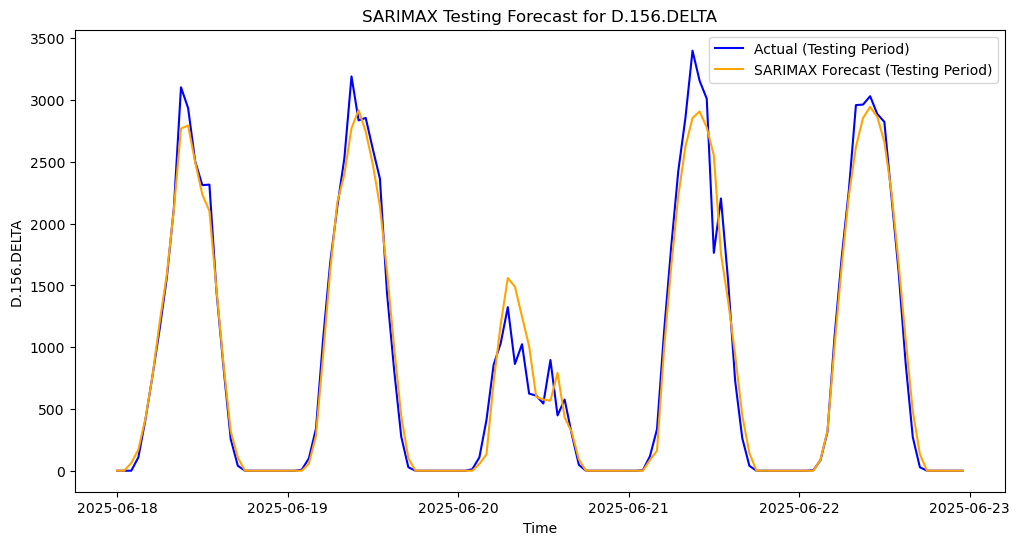


Total Energy Forecasted vs Actual for Each Day (Testing Period):
Actual Daily Sum:
2025-06-18    21876.0
2025-06-19    24272.0
2025-06-20     9672.0
2025-06-21    24792.0
2025-06-22    25164.0
Freq: D, Name: D.156.DELTA, dtype: float64
Forecasted Daily Sum:
2025-06-18    21478.175998
2025-06-19    23685.116109
2025-06-20    10762.886801
2025-06-21    23500.491381
2025-06-22    24878.157674
Freq: D, Name: predicted_mean, dtype: float64

Forecast for 2025-06-23:
2025-06-23 00:00:00      33.504412
2025-06-23 01:00:00      49.268040
2025-06-23 02:00:00      48.794202
2025-06-23 03:00:00      41.780414
2025-06-23 04:00:00     285.388989
2025-06-23 05:00:00     988.699592
2025-06-23 06:00:00    1628.067824
2025-06-23 07:00:00    2196.571981
2025-06-23 08:00:00    2593.906621
2025-06-23 09:00:00    2856.654266
2025-06-23 10:00:00    2926.277872
2025-06-23 11:00:00    2741.869399
2025-06-23 12:00:00    2434.976397
2025-06-23 13:00:00    1957.625525
2025-06-23 14:00:00    1385.350032
2025-06-2

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


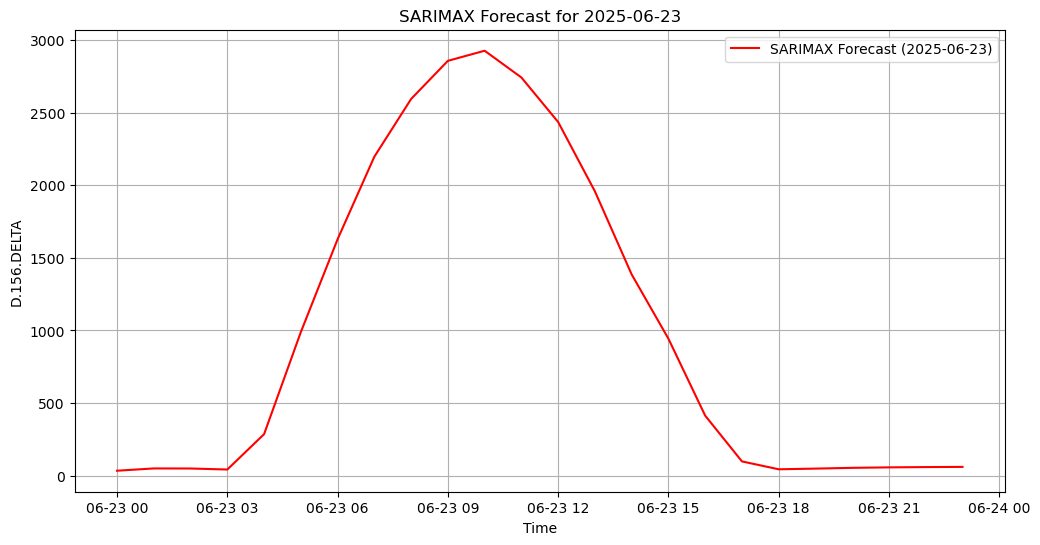

In [9]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the index is in datetime format
df_updated.index = pd.to_datetime(df_updated.index)

# Define the target variable and exogenous variables
target_variable = "D.156.DELTA"
exogenous_variables = ["172", "D.171.ISIRR"]

# Prepare the data
y = df_updated[target_variable]  # Target variable
X = df_updated[exogenous_variables]  # Exogenous variables

# Handle missing values (fill or drop)
y = y.fillna(method="ffill")  # Forward fill missing values
X = X.fillna(method="ffill")  # Forward fill missing values

# Split the data into training, testing, and forecasting sets
train_end = pd.Timestamp("2025-06-17 23:59:59")  # Training ends before testing starts
test_start = pd.Timestamp("2025-06-18 00:00:00")  # Testing starts
test_end = pd.Timestamp("2025-06-22 23:59:59")  # Testing ends
forecast_start = pd.Timestamp("2025-06-23 00:00:00")  # Forecasting starts
forecast_end = pd.Timestamp("2025-06-23 23:59:59")  # Forecasting ends

# Training data
y_train = y[:train_end]  # Training data
X_train = X[:train_end]  # Exogenous variables for training

# Testing data
y_test = y[test_start:test_end]
X_test = X[test_start:test_end]

# Forecasting data
X_forecast = X[forecast_start:forecast_end]

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(
    y_train,
    exog=X_train,  # Include exogenous variables
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Seasonal order (P, D, Q, s) for daily seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit()

# Forecast the testing period (2025-06-18 to 2025-06-22)
forecast_test = sarimax_result.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
forecast_test.index = y_test.index  # Align forecast index with actual data

# Ground predictions to 0 where irradiance is <4 during the testing period
forecast_test.loc[X_test["D.171.ISIRR"] < 4] = 0

# Compute evaluation metrics for the testing period
mae = mean_absolute_error(y_test, forecast_test)
mse = mean_squared_error(y_test, forecast_test)
rmse = np.sqrt(mse)

# Compute daily sums for actual and forecasted values (testing period)
y_test_daily_sum = y_test.resample('D').sum()
forecast_test_daily_sum = forecast_test.resample('D').sum()

# Calculate daily accuracy based on the full day
daily_difference = np.abs(y_test_daily_sum - forecast_test_daily_sum)
daily_accuracy = 100 - (daily_difference / y_test_daily_sum * 100).mean()

# Display metrics
print("Evaluation Metrics for Testing Period:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\nDaily Accuracy Based on Full Day:")
print(f"Accuracy Percentage: {daily_accuracy:.2f}%")

# Plot the testing forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual (Testing Period)", color="blue")
plt.plot(forecast_test, label="SARIMAX Forecast (Testing Period)", color="orange")
plt.title("SARIMAX Testing Forecast for D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.show()

# Display daily sums for testing
print("\nTotal Energy Forecasted vs Actual for Each Day (Testing Period):")
print("Actual Daily Sum:")
print(y_test_daily_sum)
print("Forecasted Daily Sum:")
print(forecast_test_daily_sum)

# Forecast the next day (2025-06-23)
forecast_future = sarimax_result.get_forecast(steps=len(X_forecast), exog=X_forecast).predicted_mean
forecast_future.index = X_forecast.index  # Align forecast index with future timestamps

# Calculate the total forecast for 2025-06-23
total_forecast_2025_06_23 = forecast_future.sum()

# Display the forecast for the next day
print("\nForecast for 2025-06-23:")
print(forecast_future)
print(f"\nTotal Forecast for 2025-06-23 (D.156.DELTA): {total_forecast_2025_06_23:.2f}")

# Plot the forecast for the next day
plt.figure(figsize=(12, 6))
plt.plot(forecast_future, label="SARIMAX Forecast (2025-06-23)", color="red")
plt.title("SARIMAX Forecast for 2025-06-23")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.grid()
plt.show()

In [21]:
df_updated[df_updated["D.156.DELTA"].isna()]

,172,D.156.DELTA,D.171.ISIRR
2025-06-23 09:00:00,34.414116,NaN,961.864940
2025-06-23 10:00:00,35.786494,NaN,1002.964680
2025-06-23 11:00:00,36.926265,NaN,940.415646
2025-06-23 12:00:00,37.903212,NaN,813.606716
2025-06-23 13:00:00,38.240491,NaN,637.075313
2025-06-23 14:00:00,38.426577,NaN,454.795420
2025-06-23 15:00:00,38.019515,NaN,312.422555
2025-06-23 16:00:00,36.926265,NaN,132.840932
2025-06-23 17:00:00,34.972372,NaN,23.199259
2025-06-23 18:00:00,32.122943,NaN,0.000000


In [23]:
# Ensure the index is in datetime format
df_updated.index = pd.to_datetime(df_updated.index)

# Truncate the DataFrame to end at 2025-06-23 09:00:00
df_updated_truncated = df_updated.loc[:'2025-06-23 08:00:00'].copy()  # Create a hard copy

# Display the truncated DataFrame
print(df_updated_truncated)

                           172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00   3.226000        440.0   675.620000
2022-03-18 08:00:00   4.607000       3344.0   836.143000
2022-03-18 09:00:00   5.690000       3572.0   939.744000
2022-03-18 10:00:00   6.827000       3452.0   972.460000
2022-03-18 11:00:00   7.632000       3040.0   792.876000
...                        ...          ...          ...
2025-06-23 04:00:00  19.690131        312.0    92.386430
2025-06-23 05:00:00  23.458355       1060.0   303.819374
2025-06-23 06:00:00  27.366142       1696.0   510.471687
2025-06-23 07:00:00  30.355135       2260.0   701.041917
2025-06-23 08:00:00  32.681199       2644.0   857.424280

[28619 rows x 3 columns]


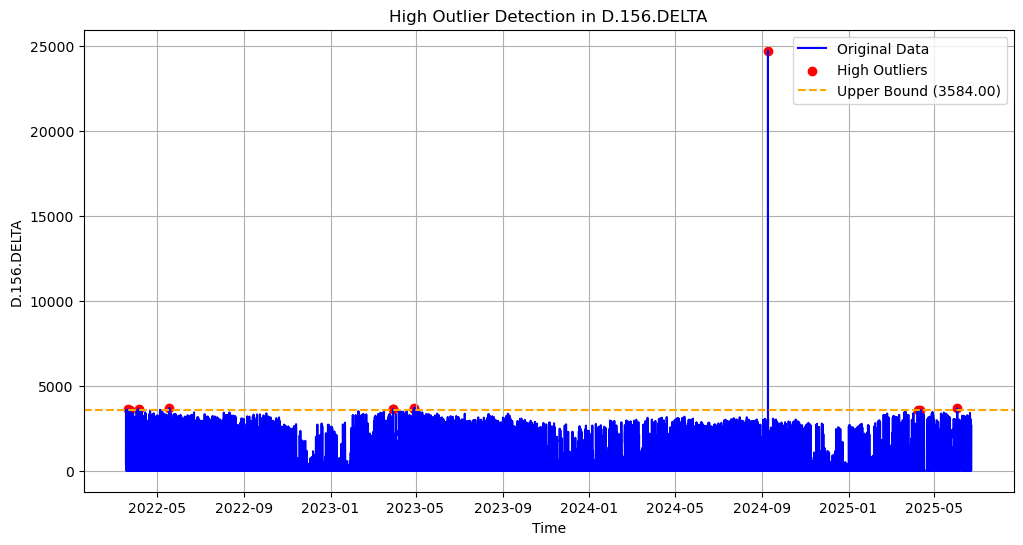

High Outliers Detected:
                        172  D.156.DELTA  D.171.ISIRR
2022-03-21 11:00:00  14.618       3624.0      988.392
2022-03-23 09:00:00  15.254       3588.0      956.991
2022-04-05 09:00:00  16.834       3640.0     1003.985
2022-05-18 11:00:00  19.567       3684.0     1029.620
2023-03-30 09:00:00  11.613       3628.0     1008.366
2023-03-30 11:00:00  13.868       3616.0     1031.622
2023-04-29 09:00:00  17.450       3716.0     1054.799
2023-04-29 11:00:00  19.081       3620.0     1033.640
2024-09-09 07:00:00  25.707      24712.0      705.283
2025-04-08 10:00:00  12.535       3596.0     1073.018
2025-04-12 10:00:00  13.704       3588.0     1071.245
2025-06-03 10:00:00  35.024       3676.0      990.875


In [30]:
import matplotlib.pyplot as plt

# Outlier detection for extremely high values using IQR
def detect_high_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define the upper bound for extreme outliers
    upper_bound = Q3 + 2.5 * IQR

    # Identify only high outliers
    high_outliers = df[df[column] > upper_bound]
    return high_outliers, upper_bound

# Perform outlier detection on the "D.156.DELTA" column in df_updated_truncated
high_outliers, upper_bound = detect_high_outliers(df_updated_truncated, "D.156.DELTA")

# Plot the original data and highlight the high outliers
plt.figure(figsize=(12, 6))
plt.plot(df_updated_truncated.index, df_updated_truncated["D.156.DELTA"], label="Original Data", color="blue")
plt.scatter(high_outliers.index, high_outliers["D.156.DELTA"], color="red", label="High Outliers", marker="o")
plt.axhline(y=upper_bound, color="orange", linestyle="--", label=f"Upper Bound ({upper_bound:.2f})")
plt.title("High Outlier Detection in D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.grid()
plt.show()

# Display the high outliers
print("High Outliers Detected:")
print(high_outliers)

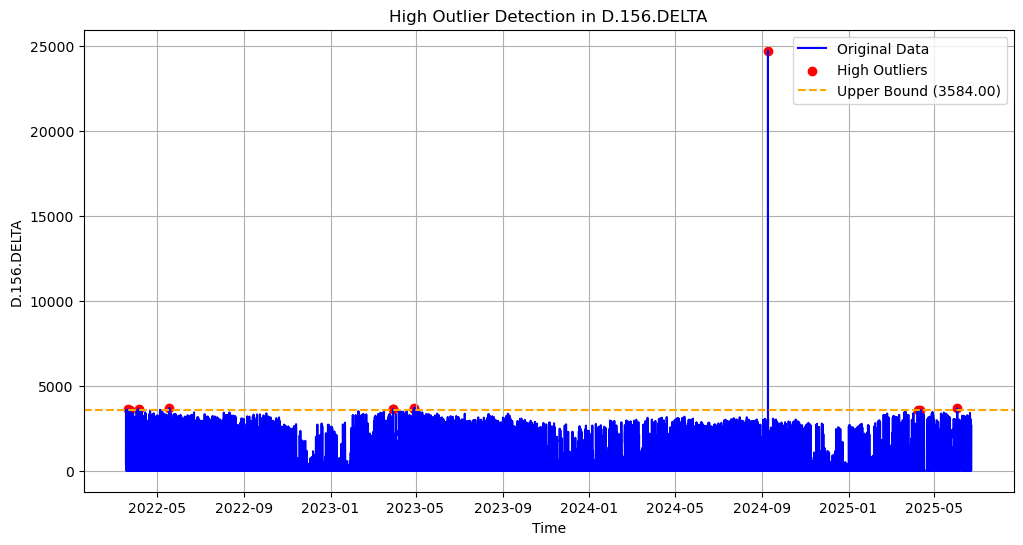

High Outliers Detected:
                        172  D.156.DELTA  D.171.ISIRR
2022-03-21 11:00:00  14.618       3624.0      988.392
2022-03-23 09:00:00  15.254       3588.0      956.991
2022-04-05 09:00:00  16.834       3640.0     1003.985
2022-05-18 11:00:00  19.567       3684.0     1029.620
2023-03-30 09:00:00  11.613       3628.0     1008.366
2023-03-30 11:00:00  13.868       3616.0     1031.622
2023-04-29 09:00:00  17.450       3716.0     1054.799
2023-04-29 11:00:00  19.081       3620.0     1033.640
2024-09-09 07:00:00  25.707      24712.0      705.283
2025-04-08 10:00:00  12.535       3596.0     1073.018
2025-04-12 10:00:00  13.704       3588.0     1071.245
2025-06-03 10:00:00  35.024       3676.0      990.875

Data for Each Outlier's Day:

Outlier at 2022-03-21 11:00:00:
Data for 2022-03-21:
                        172  D.156.DELTA  D.171.ISIRR
2022-03-21 00:00:00  -3.524          0.0        1.831
2022-03-21 01:00:00  -2.623          0.0        0.815
2022-03-21 02:00:00  -2.781 

In [32]:
import matplotlib.pyplot as plt

# Outlier detection for extremely high values using IQR
def detect_high_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define the upper bound for extreme outliers
    upper_bound = Q3 + 2.5 * IQR

    # Identify only high outliers
    high_outliers = df[df[column] > upper_bound]
    return high_outliers, upper_bound

# Perform outlier detection on the "D.156.DELTA" column in df_updated_truncated
high_outliers, upper_bound = detect_high_outliers(df_updated_truncated, "D.156.DELTA")

# Plot the original data and highlight the high outliers
plt.figure(figsize=(12, 6))
plt.plot(df_updated_truncated.index, df_updated_truncated["D.156.DELTA"], label="Original Data", color="blue")
plt.scatter(high_outliers.index, high_outliers["D.156.DELTA"], color="red", label="High Outliers", marker="o")
plt.axhline(y=upper_bound, color="orange", linestyle="--", label=f"Upper Bound ({upper_bound:.2f})")
plt.title("High Outlier Detection in D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.grid()
plt.show()

# Display the high outliers
print("High Outliers Detected:")
print(high_outliers)

# Show all data for the specific day of each outlier
print("\nData for Each Outlier's Day:")
for index in high_outliers.index:
    # Extract the date of the outlier
    outlier_date = index.date()
    
    # Filter the DataFrame for the specific day
    day_data = df_updated_truncated[df_updated_truncated.index.date == outlier_date]
    
    print(f"\nOutlier at {index}:")
    print(f"Data for {outlier_date}:")
    print(day_data)